# Inference for Sentiment Analysis Tasks(using ML HuggingFace pre-trained models) 

## Binary Classification(0,1) 

### Import some needed packages

In [2]:
# Import some needed libraries
# python --version ==3.8
# for data processing
#!pip install nltk
#!pip install openpyxl
# for model inference
#!pip install emot (package for emoje processing)
#pip install torch # in ordeer to user the package "transformers", the torch version must be >2.0(2.1 in this case)
#!pip install flash-attention
#!pip install transformers (Install HuggingFace's sentiment analysis Transformer model)
# for ploting
#!pip install plotly
#!pip install matplotlib
#!pip install seaborn
import pandas as pd
import data_preprocessing
# For model analysis
from transformers import pipeline #model parameters = 268M
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jamesjr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load the data from the Excel file
df = pd.read_excel('question2.xlsx')

In [4]:
print(df.head(20)) #this looks like Twitter data(Problem is Twitter sentiment analysis)

    ID                                           TextData
0    1  Happy anniversary! ❤ Next stop: Paris! ✈ #vaca...
1    2  Haha, BBQ on the beach, engage smug mode! 😍 😎 ...
2    3  getting ready for Saturday night 🍕 #yum #weeke...
3    4           Say it with me - I NEED A #VACATION!!! ☹
4    5  😎 Chilling 😎 at home for the first time in age...
5    6              My last #weekend before the exam 😢 👎.
6    7     can’t believe my #vacation is over 😢 so unfair
7    8          Can’t wait for tennis this #weekend 🎾🍓🥂 😀
8    9  I had so much fun! 😀😀😀 Best trip EVER! 😀😀😀 #va...
9   10  Hot weather and air con broke in car 😢 #sweaty...
10  11  🎉 Check the out-of-office crew, we are officia...
11  12  Well that wasn’t how I expected this #weekend ...
12  13  So excited for my bestie to visit this #weeken...
13  14  Who needs a #vacation when the weather is this...
14  15  I love meetings in summer that run into the we...
15  16  You know we all worked hard for this! We totes...
16  17  So ang

In [5]:
#Data Preprocessing

In [6]:
#apply all the functions above
df['TextData'] = df.TextData.apply(func = data_preprocessing.clean_text)

In [7]:
print(df.head(20))

    ID                                           TextData
0    1  happy anniversary red heart next stop paris ai...
1    2  haha bbq beach engage smug mode smiling heart ...
2    3  getting ready saturday night pizza yum weekend...
3    4                         say need vacation frowning
4    5  smiling sunglasses chilling smiling sunglasses...
5    6               last weekend exam crying thumbs down
6    7                     believe vacation crying unfair
7    8  wait tennis weekend tennisstrawberryclinking g...
8    9  much fun grinning facegrinning facegrinning be...
9   10  hot weather air con broke car crying sweaty ro...
10  11  party popper check out of office crew official...
11  12  well wasnt expected weekend go thumbs total wa...
12  13  excited bestie visit weekend grinning red hear...
13  14  needs vacation weather good sun smiling sungla...
14  15  love meetings summer run weekend wait sarcasm ...
15  16  know worked hard this totes deserve party popp...
16  17  angry 

### Model Inference

In [8]:
#Model Inference 
sentiment_model = pipeline(model="federicopascual/finetuning-sentiment-model-3000-samples")

In [9]:
# Create a list to store the sentiments and scores
sentiments = []

# Iterate through the rows of the DataFrame and analyze the sentiment
for index, row in df.iterrows():
    text = row['TextData']
    result = sentiment_model([text])
    sentiment_label = result[0]['label']
    sentiment_score = result[0]['score']
    sentiments.append((index, text, sentiment_label, sentiment_score))

In [10]:
sentiments

[(0,
  'happy anniversary red heart next stop paris airplane vacation',
  'LABEL_1',
  0.8146459460258484),
 (1,
  'haha bbq beach engage smug mode smiling heart eyes smiling sunglasses red heart party popper vacation',
  'LABEL_1',
  0.5429039597511292),
 (2,
  'getting ready saturday night pizza yum weekend smiling sunglasses',
  'LABEL_1',
  0.5946772694587708),
 (3, 'say need vacation frowning', 'LABEL_0', 0.6328253746032715),
 (4,
  'smiling sunglasses chilling smiling sunglasses home first time agesthis life thumbs weekend',
  'LABEL_1',
  0.8429057598114014),
 (5, 'last weekend exam crying thumbs down', 'LABEL_0', 0.7079047560691833),
 (6, 'believe vacation crying unfair', 'LABEL_0', 0.8433552980422974),
 (7,
  'wait tennis weekend tennisstrawberryclinking glasses grinning',
  'LABEL_0',
  0.6167863011360168),
 (8,
  'much fun grinning facegrinning facegrinning best trip ever grinning facegrinning facegrinning vacation weekend',
  'LABEL_1',
  0.8920860290527344),
 (9,
  'hot we

In [11]:
# Create a DataFrame from the sentiments list
sentiments_df = pd.DataFrame(sentiments, columns=['ID', 'TextData', 'Sentiment', 'SentimentScore'])

In [12]:
sentiments_df

,ID,TextData,Sentiment,SentimentScore
0,0,happy anniversary red heart next stop paris ai...,LABEL_1,0.814646
1,1,haha bbq beach engage smug mode smiling heart ...,LABEL_1,0.542904
2,2,getting ready saturday night pizza yum weekend...,LABEL_1,0.594677
3,3,say need vacation frowning,LABEL_0,0.632825
4,4,smiling sunglasses chilling smiling sunglasses...,LABEL_1,0.842906
5,5,last weekend exam crying thumbs down,LABEL_0,0.707905
6,6,believe vacation crying unfair,LABEL_0,0.843355
7,7,wait tennis weekend tennisstrawberryclinking g...,LABEL_0,0.616786
8,8,much fun grinning facegrinning facegrinning be...,LABEL_1,0.892086
9,9,hot weather air con broke car crying sweaty ro...,LABEL_0,0.928911


### Model Post-Analysis

#### Displaying the top 10 most positive and negative sentiments

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
top_negative = sentiments_df.nlargest(10, 'SentimentScore')
top_positive = sentiments_df.nsmallest(10, 'SentimentScore')

/tmp/ipykernel_31178/707456273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SentimentScore', y='TextData', data=top_negative, palette='Reds')


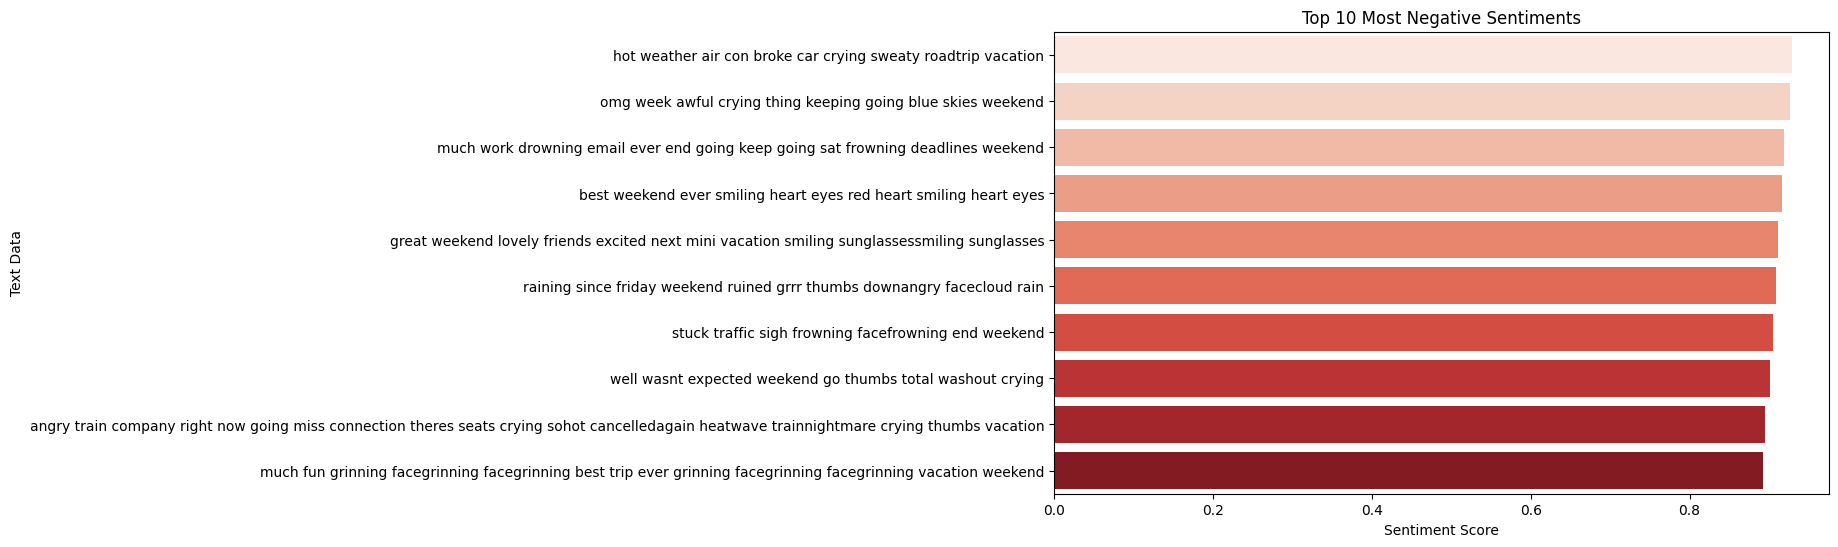

In [14]:
# Plot bar chart for Top 10 Most Negative Sentiments
plt.figure(figsize=(10, 6))
sns.barplot(x='SentimentScore', y='TextData', data=top_negative, palette='Reds')
plt.title('Top 10 Most Negative Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Text Data')
plt.show()

/tmp/ipykernel_31178/6948594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SentimentScore', y='TextData', data=top_positive, palette='Greens')


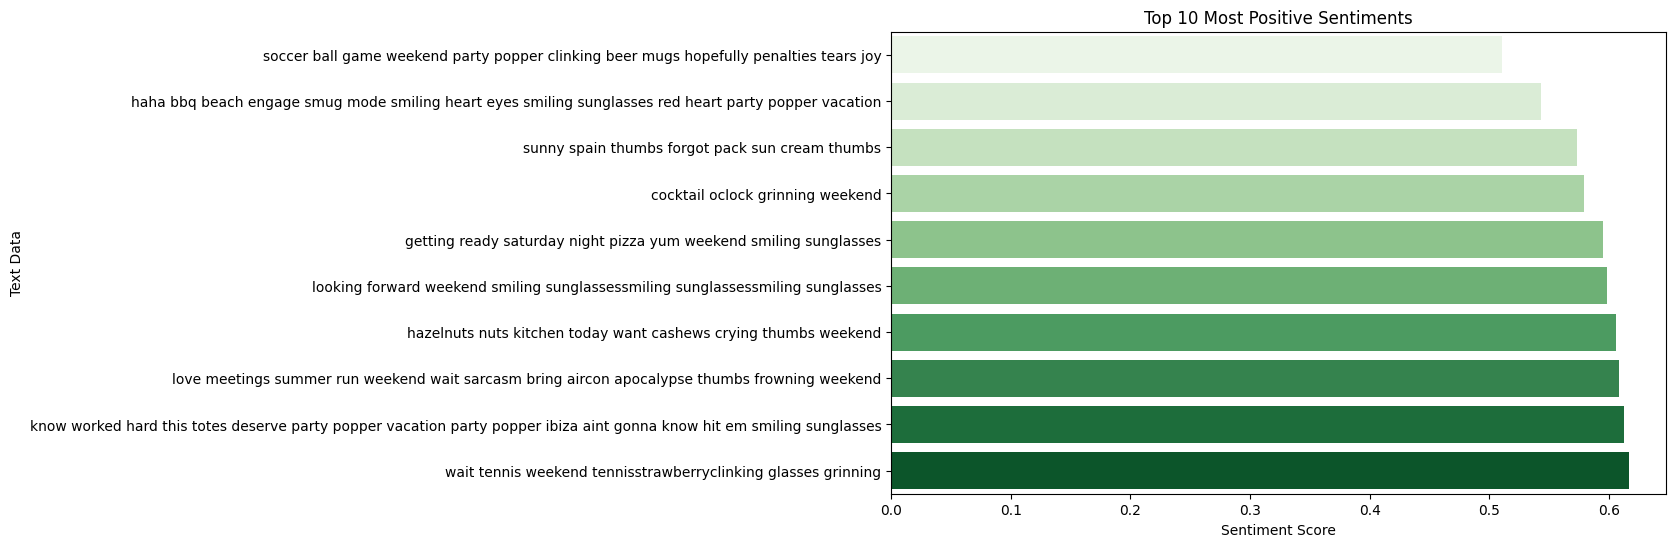

In [15]:
# Plot bar chart for Top 10 Most Positive Sentiments
plt.figure(figsize=(10, 6))
sns.barplot(x='SentimentScore', y='TextData', data=top_positive, palette='Greens')
plt.title('Top 10 Most Positive Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Text Data')
plt.show()

# multi-class(-1,0,1) 

In [27]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import numpy as np
from scipy.special import softmax

#df['TextData']

# Model and tokenizer
MODEL = "Davlan/afrisenti-twitter-sentiment-afroxlmr-large"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Function to get sentiment scores
def get_sentiment_scores(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

# Function to print sentiment rankings
def print_sentiment_ranking(scores, id2label):
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = id2label[ranking[i]]
        s = scores[ranking[i]]
        print(f"{i + 1}) {l} {np.round(float(s), 4)}")

# Iterate through the DataFrame and apply the functions
for index, row in df.iterrows():
    text = row['TextData']
    scores = get_sentiment_scores(text)
    id2label = {0: "positive", 1: "neutral", 2: "negative"}
    print(f"Sentiment scores for text: '{text}'")
    print_sentiment_ranking(scores, id2label)
    print("\n")

Sentiment scores for text: 'happy anniversary red heart next stop paris airplane vacation'
1) positive 0.9891
2) negative 0.0096
3) neutral 0.0013


Sentiment scores for text: 'haha bbq beach engage smug mode smiling heart eyes smiling sunglasses red heart party popper vacation'
1) positive 0.9212
2) negative 0.0599
3) neutral 0.0189


Sentiment scores for text: 'getting ready saturday night pizza yum weekend smiling sunglasses'
1) positive 0.9867
2) negative 0.0111
3) neutral 0.0022


Sentiment scores for text: 'say need vacation frowning'
1) positive 0.9202
2) negative 0.0693
3) neutral 0.0105


Sentiment scores for text: 'smiling sunglasses chilling smiling sunglasses home first time agesthis life thumbs weekend'
1) positive 0.8544
2) neutral 0.0899
3) negative 0.0557


Sentiment scores for text: 'last weekend exam crying thumbs down'
1) negative 0.9272
2) positive 0.0561
3) neutral 0.0168


Sentiment scores for text: 'believe vacation crying unfair'
1) negative 0.9286
2) positive 0

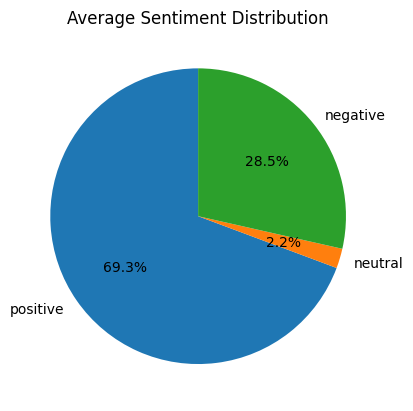

In [28]:
# Iterate through the DataFrame and calculate sentiment scores
sentiment_scores_list = []
for index, row in df.iterrows():
    text = row['TextData']
    scores = get_sentiment_scores(text)
    sentiment_scores_list.append(scores)

# Calculate the average sentiment scores
average_sentiment_scores = np.mean(sentiment_scores_list, axis=0)

# Map sentiment labels to indices
id2label = {0: "positive", 1: "neutral", 2: "negative"}

# Pie chart
labels = [id2label[i] for i in range(len(id2label))]
plt.pie(average_sentiment_scores, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Average Sentiment Distribution')
plt.show()

DataFrame with Sentiment Labels:


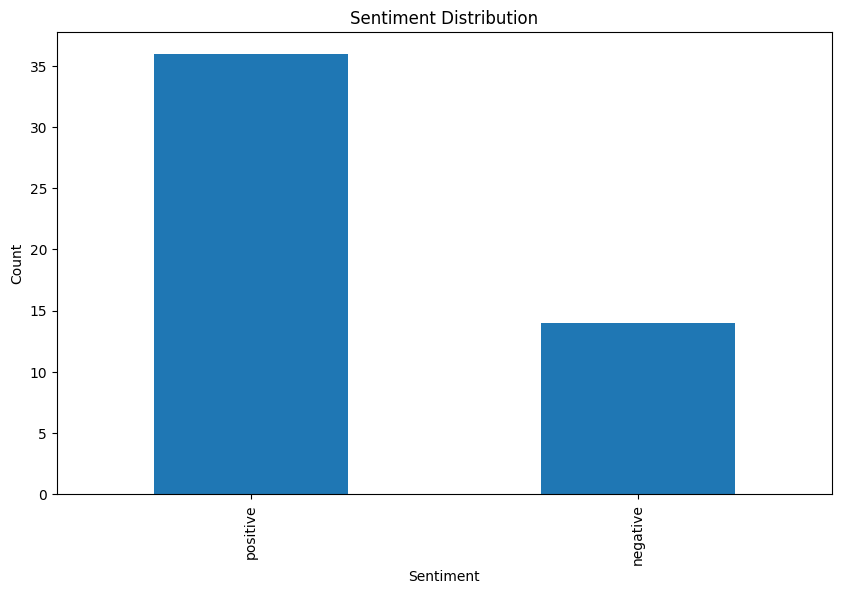

In [29]:
# Iterate through the DataFrame and calculate sentiment scores for each text
df['SentimentScores'] = df['TextData'].apply(get_sentiment_scores)

# Map sentiment labels to indices
id2label = {0: "positive", 1: "neutral", 2: "negative"}

# Function to get the sentiment label for a given text
def get_sentiment_label(scores):
    return id2label[np.argmax(scores)]

# Apply the function to create a new column 'SentimentLabel'
df['SentimentLabel'] = df['SentimentScores'].apply(get_sentiment_label)

# Display the DataFrame with sentiment labels
print("DataFrame with Sentiment Labels:")


# Count the occurrences of each sentiment label
sentiment_counts = df['SentimentLabel'].value_counts()

# Bar chart for top 10 most positive, negative, and neutral texts
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()